In [21]:
# calulate ripley statistics

import squidpy as sq
import numpy as np
from scipy.io import mmread
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt
import importlib
# import ib_module_v2 as ib
# from ib_module_v2 import *
import matplotlib as mpl
import seaborn as sns
import time
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn import svm
import random
import re
import os
import pandas as pd
matplotlib.rcParams.update({'font.size': 16})

In [23]:
df = pd.read_csv('G:/My Drive/Articles/Article_Reconstruction/Manuscript/EMBO/Revisons/Ripleys/MegaTable_Whisker_deprived.csv')
df

name  \
0     Cell_001_MPD_9_FT_5_XYZ_Sorted.swc_N3DFix.swc_...   
1     Cell_005_MPD_9_FT_5_XYZ_Sorted.swc_N3DFix.swc_...   
2     Cell_007_MPD_12_FT_5_XYZ_Sorted.swc_N3DFix.swc...   
3     Cell_009_MPD_12_FT_5_XYZ_Sorted.swc_N3DFix.swc...   
4     Cell_010_MPD_12_FT_5_XYZ_Sorted.swc_N3DFix.swc...   
...                                                 ...   
2794  Cell_263_MPD_12_FT_5_XYZ_Sorted.swc_N3DFix.swc...   
2795  Cell_267_MPD_12_FT_5_XYZ_Sorted.swc_N3DFix.swc...   
2796  Cell_268_MPD_12_FT_5_XYZ_Sorted.swc_N3DFix.swc...   
2797  Cell_272_MPD_12_FT_30_XYZ_Sorted.swc_N3DFix.sw...   
2798  Cell_278_MPD_12_FT_10_XYZ_Sorted.swc_N3DFix.sw...   

      all_mean_local_bifurcation_angle  all_std_local_bifurcation_angle  \
0                             1.071393                         0.440289   
1                             1.104687                         0.498717   
2                             1.121387                         0.403366   
3                             1.023200                         0.284600   
4                             1.173956                         0.405520   
...                                ...                              ...   
2794                          1.065057                         0.254808   
2795                          1.031594                         0.361010   
2796                          1.184684                         0.147525   
2797                          1.004983                         0.221868   
2798                          1.000870                         0.260814   

      all_mean_principal_direction_extent  all_std_principal_direction_extent  \
0                              314.848110                          248.091319   
1                              309.580628                           46.610141   
2                              225.546718                          136.605287   
3                              307.228600                           17.498601   
4                              226.987039                          126.618234   
...                                   ...                                 ...   
2794                           288.882348                           10.950444   
2795                           308.300073                           48.691524   
2796                           321.698633                           18.999674   
2797                           292.649887                           35.655792   
2798                           350.181712                          250.943489   

      all_mean_neurite_length  all_std_neurite_length  \
0                 1107.862018             1027.706266   
1                  811.865176              102.751052   
2                  815.295827              894.764177   
3                  845.984145              555.825322   
4                  442.142155              359.714921   
...                       ...                     ...   
2794               500.202001              109.006366   
2795               551.380304              275.733526   
2796               653.316463              139.648513   
2797               574.447696              187.761728   
2798               610.800665              561.352749   

      all_mean_number_of_bifurcation  all_mean_number_of_forking_point  \
0                                 39                                40   
1                                 21                                21   
2                                 36                                38   
3                                 15                                16   
4                                 20                                20   
...                              ...                               ...   
2794                              16                                16   
2795                              23                                24   
2796                              11                                11   
2797                              15       

In [190]:
import ripleyk
k = {}
dep = {}
dep_m = {}
for s in np.unique(df['SampleNo']):
    # df1 = df[['COMxyz_1','COMxyz_2','COMxyz_3','Deprived','Deprived_Mouse','Internal_No','SampleNo']]
    df1 = df.loc[np.where(df['SampleNo'] == s)[0],:]
    deprived = np.unique(df1['Deprived'])[0]
    deprived_mouse = np.unique(df1['Deprived_Mouse'])[0]
    df1 = df1[['COMxyz_1','COMxyz_2','COMxyz_3']]

    df1 = df1/np.max(df1)
    radii = list(np.linspace(0,1,num=30))
        # [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
    k[s] = ripleyk.calculate_ripley(radii, 1, d1=df1['COMxyz_1'], d2=df1['COMxyz_2'], d3=df1['COMxyz_3'],boundary_correct=False, CSR_Normalise=True)
    dep[s] = deprived + deprived_mouse

    # plt.plot(radii, k, 'bo')
    # print(deprived)
    # plt.show()

    # fig = plt.figure(figsize=(12, 12))
    # ax = fig.add_subplot(projection='3d')
    # ax.scatter(df1['COMxyz_1'],df1['COMxyz_2'], df1['COMxyz_3'],marker='o',linewidth=0)
    # print(k)
    

C:\Users\Nadav yayon\anaconda3\envs\scvi-env\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)
C:\Users\Nadav yayon\anaconda3\envs\scvi-env\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)
C:\Users\Nadav yayon\anaconda3\envs\scvi-env\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)
C

In [191]:
dfk = pd.DataFrame.from_dict(k,orient='index')
dfd = pd.DataFrame.from_dict(dep,orient='index',columns=['deprived'])
dfd

deprived
1          0
2          0
3          1
4          2
5          2
6          1
7          1
8          2
9          0
10         0
11         2
12         1
13         0
14         0
15         2
16         1
17         1
18         2
19         1
20         2
21         0
22         0
23         2
24         1

C:\Users\Nadav yayon\anaconda3\envs\scvi-env\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


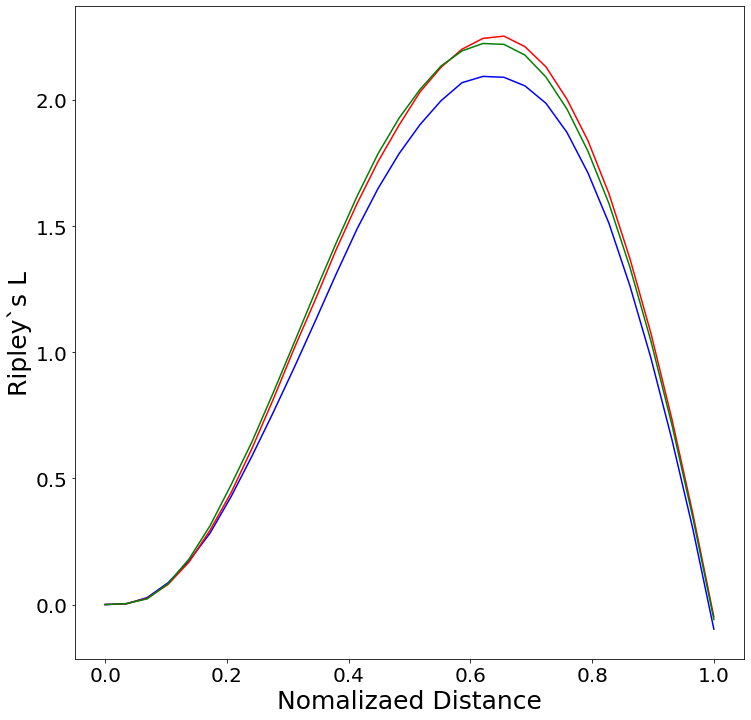

In [206]:
plt.figure(figsize=[12,12])
plt.plot(radii,np.mean(dfk.iloc[np.where(dfd['deprived']==0)]), 'b-')
plt.plot(radii,np.mean(dfk.iloc[np.where(dfd['deprived']==1)]), 'r-')
plt.plot(radii,np.mean(dfk.iloc[np.where(dfd['deprived']==2)]), 'g-')
plt.ylabel('Ripley`s L', fontsize=25)
plt.xlabel('Nomalizaed Distance', fontsize=25)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.savefig('ripleys.pdf', bbox_inches='tight', dpi=150)
plt.show()


In [14]:
np.where(df['SampleNo'] == 1)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39], dtype=int64),)

In [154]:
dfk.iloc[np.where(dfd['deprived']==0)]

0         1         2         3         4         5         6  \
1   0.095295  0.254469  0.572817  0.993790  1.298525  1.561372  1.573938   
2   0.072169  0.400095  0.845925  1.267262  1.620793  1.811390  1.794831   
9   0.102813  0.499780  1.075362  1.731756  2.210945  2.470629  2.364370   
10  0.071031  0.340878  0.768168  1.271354  1.691960  1.888603  1.836151   
13  0.079980  0.379028  0.787843  1.190477  1.554599  1.783644  1.784369   
14  0.068472  0.423736  0.966782  1.560599  2.018618  2.254903  2.196286   
21  0.072308  0.474588  1.094743  1.738543  2.222225  2.503747  2.406593   
22  0.077058  0.414759  0.971721  1.613658  2.134577  2.399484  2.344389   

           7         8         9  
1   1.326799  0.616799 -0.340339  
2   1.471443  0.827002 -0.142717  
9   1.904799  1.079945 -0.036335  
10  1.593240  0.935574 -0.097871  
13  1.498416  0.916710 -0.053990  
14  1.793617  1.049428 -0.035266  
21  1.895968  1.069134 -0.045093  
22  1.902478  1.090653 -0.028966